## Ch4 lab: classification methods

### 1 Libraries and dataset(s)

In [1]:
import numpy as np # numerical computing library for working with arrays, linear algebra etc
import matplotlib.pyplot as plt # for creating plots
import pandas as pd  # data manipulation and analysis library for creating data structures 
import math
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.regressionplots import * # imports all
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing

In [2]:
Smarket = pd.read_csv('data/Smarket.csv', header=0)

#### Dataset description

Smarket contains daily stock market returns for the S&P 500 index from 2001 to 2005 (a total of 1,250 observations). Variables include:

- <b>'Year'</b> : the year of the observation.
- <b>'Lag1', 'Lag2, 'Lag3', 'Lag4', 'Lag5'</b>: the % returns for each lagged day, where 'Lag1' corresponds to the % return for the previous day,  'Lag2' corresponds to the % return for 2 days previous, and so on. 
- <b>'Volume'</b>: the number of shares traded on the previous day, in billions.
- <b>'Today'</b>: the % returns for the current day
- <b>'Direction'</b>: a binary variable indicating whether the market went up or down on the current day.

The goal is to use the dataset to predict the direction of the stock market based on the previou day's returns and the current day's volume. 

Note: the S&P 500 index tracks the stock performance of the 500 largest companies listed on the US stock exchange.

In [3]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
Smarket.shape

(1250, 9)

In [6]:
Smarket.corr() # computes the correlation matrix for the columns of the Smarket DataFrame.

/var/folders/s2/kw61_ydd4hsfrljr6vzdssy00000gn/T/ipykernel_68844/3934422238.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Smarket.corr() # computes the correlation matrix for the columns of the Smarket DataFrame.


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [7]:
# Given error message above, creating subset of only numeric values
Smarket_subset = Smarket[['Lag1', 'Lag2', 'Lag3', 'Lag5','Volume', 'Today']] 
Smarket_subset.corr()

,Lag1,Lag2,Lag3,Lag5,Volume,Today
Lag1,1.000000,-0.026294,-0.010803,-0.005675,0.040910,-0.026155
Lag2,-0.026294,1.000000,-0.025897,-0.003558,-0.043383,-0.010250
Lag3,-0.010803,-0.025897,1.000000,-0.018808,-0.041824,-0.002448
Lag5,-0.005675,-0.003558,-0.018808,1.000000,-0.022002,-0.034860
Volume,0.040910,-0.043383,-0.041824,-0.022002,1.000000,0.014592
Today,-0.026155,-0.010250,-0.002448,-0.034860,0.014592,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

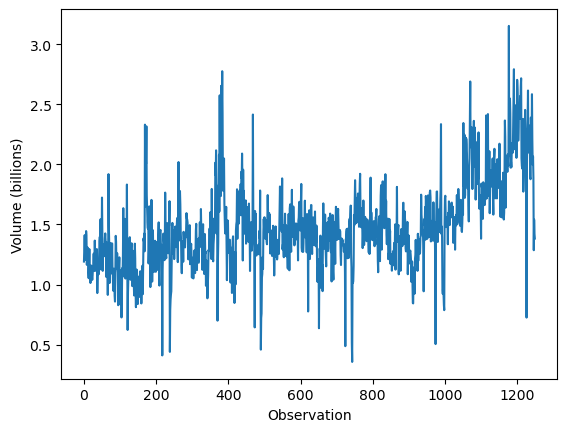

In [8]:
# plotting the volume column
plt.plot(Smarket[['Volume']])
plt.xlabel('Observation')
plt.ylabel('Volume (billions)')
plt.show

### 2 Logistic regression

In [9]:
# Using 'dmatrices()' function in 'statsmodels' library to create two dataframes, 'y' and 'X'
y, X = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket, return_type = 'dataframe')
print(y)

      Direction[Down]  Direction[Up]
0                 0.0            1.0
1                 0.0            1.0
2                 1.0            0.0
3                 0.0            1.0
4                 0.0            1.0
...               ...            ...
1245              0.0            1.0
1246              1.0            0.0
1247              0.0            1.0
1248              1.0            0.0
1249              1.0            0.0

[1250 rows x 2 columns]


<b> Notes on interpretation </b>

- 'y' dataframe contains the response variable ('Direction') with two columns (0 = down, 1 = up).
- The formula 'Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume' specifies that 'Direction' is the response variable and that the others are predictors. 
- 'X' is the dataframe containing the predictor variables.

<b>How does Python know X is the dataframe containing all the precitor variables? </b>
- The 'dmatrices()' function returns two objects, 'y' and 'X'
- This function operates by assigning the first returned object (here, 'Direction') to the first variable name on the left side of the assignment (here, 'y')  
- The function also assigns the second returned object (here, 'Lag1+Lag2+Lag3+Lag4+Lag5+Volume') to the second variable name on the left side of the assignment('X')

In [10]:
# creating a model to predict whether the stock market direction will be up

logit = sm.Logit(y.iloc[:,1], X) # interested in stock market going up, so selecting column 1 in 'y'
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 07 May 2023   Pseudo R-squ.:                0.002074
Time:                        12:54:16   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [11]:
# accessing the parameters / coefficients directly
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [12]:
# determining the probability that the market will be up for the first 10 instances 
# instances of what? 
logit.fit().predict()[0:10]

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [1]:
# performing binary classification using logistic regression

threshold = 0.5
predict_label = pd.DataFrame(np.zeros(shape=(1250,1)), columns = ['Label 1'])
predict_label.iloc[logit.fit().predict()>threshold] = 1

NameError: name 'pd' is not defined

#### Notes on interpretation

- <b> 'Threshold = 0.5' </b>: setting threshold value for classificaiton to 0.5. Predicted probabilities <0.5 will be classified as 0, predicted probabilities >0.5 will be  classified as 1.
-  <b>'predict_label = pd.DataFrame(np.zeros(shape=1250,1)), columns = ['Label 1'])' </b>: creates a new dataframe called 'predict_label' containing 1250 rows and one column called 'Label 1', initisalised with zeros.
- <b> 'logit.fit()'</b>: fits a logisticregression model to the data.
- <b> 'logit.fit().predict' </b>: generates predicted probabilities for the data using the fitted logistic regression model.
- <b> 'predict_label.iloc[logit.fit().predict()>threshold] = 1' </b>: uses boolean indexing to update values of 'predict_label'
    - The expression logit.fit().predict()>threshold generates a boolean mask indicating which predicted probabilities are greater than the threshold
    - The iloc[] method selects the rows of predict_label corresponding to the True values in the boolean mask, and sets their values to 1, indicating a positive classification.

In [14]:
# computes a confusing matrix based on true labels and predicted labels of binary classification
confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0])

array([[145, 457],
       [141, 507]])

In [15]:
# calculates accuracy of binary classification model by comparing predicted labels to the true labels
# then taking mean of the resulting boolean array
print(np.mean(y.iloc[:,1] == predict_label.iloc[:,0]))

0.5216


In [16]:
# alternative method for doing above, using confusion matrix to compute accuracy
print(confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0]).diagonal().sum()* 1.0 /confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0]).sum())

0.5216


### 3 Train-validation split

Splitting the dataset into two sets (training / testing) so that we can better assess the accuracy of the logistic regression model. This will yield a more realistic error rate because we will test the models performance on classifying data it hasn't seen. 

In [17]:
Smarket_test = Smarket.query('Year >= 2005')
Smarket_train = Smarket.query('Year < 2005')

In [18]:
# split the dataset into training and testing sets and prepare them for a logistic regression model by... 
# creating design matrices for the response variable and the predictor variables.
y_train, X_train = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_train, return_type = 'dataframe')
y_test, X_test = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_test, return_type = 'dataframe')

In [19]:
logit = sm.Logit(y_train.iloc[:,1], X_train)
print(logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction[Up]   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Sun, 07 May 2023   Pseudo R-squ.:                0.001562
Time:                        12:54:19   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.

In [20]:
# performing logistic regression on the test set, 'X_test'
# then using resulting model to make predictions

preds = logit.fit().predict(X_test) # fitting model to training set
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label']) # dataframe of all zeros (?) with same no. rows as 'X_test'
threshold = 0.5
mark = (preds > threshold).reset_index(drop=True) # boolean array indicating which predictors are above threshold and therefore predicted to be positive
predict_label.loc[mark] = 1 # predictions corresponding to values above threshold (as indicated by 'mark') are changed to 1
confusion_matrix(y_test.iloc[:,1], predict_label.iloc[:,0]) 

# computing matrix is compairing the predicted values in 'predicted_label' (column 0)
# to the true values in 'y_test' (column 1)

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


array([[77, 34],
       [97, 44]])

In [21]:
# determining the accuracy

np.mean(y_test.iloc[:,1].reset_index(drop=True)==predict_label.iloc[:,0].reset_index(drop=True)) 

0.4801587301587302

#### Notes on interpretation
- Test error rate is 1-48% = 52% which is worse than random guessing (50%)
- But this result is not surprising given that we wouldn't expect to be able to use the previous days' returns to predict future market performance

In [22]:
# attempt to retrain the model using only Lag1 and lAG2
y_train, X_train = dmatrices('Direction~Lag1+Lag2', Smarket_train, return_type = 'dataframe')
y_test, X_test = dmatrices('Direction~Lag1+Lag2', Smarket_test, return_type = 'dataframe')
logit = sm.Logit(y_train.iloc[:,1], X_train)
preds = logit.fit().predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label'])
threshold = 0.5
confusion_matrix(y_test.iloc[:,1], predict_label.iloc[:,0])

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


array([[111,   0],
       [141,   0]])

In [23]:
np.mean(y_test.iloc[:,1].reset_index(drop=True)==predict_label.iloc[:,0].reset_index(drop=True)) # to get accuracy on validation set

0.44047619047619047

#### Notes on interpretation
- Test error rate is 1-44% = 56% which is worse still than previously 


In [24]:
# another attempt at retraining using different theshold level
preds = logit.fit().predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label'])
threshold = 0.45
predict_label.loc[(preds > threshold).reset_index(drop=True)] = 1
confusion_matrix(y_test.iloc[:,1], predict_label.iloc[:,0])

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


array([[  0, 111],
       [  0, 141]])

In [25]:
np.mean(y_test.iloc[:,1].reset_index(drop=True)==predict_label.iloc[:,0].reset_index(drop=True))

0.5595238095238095

#### Notes on interpretation 
- Now seeing improvement on accuracy with test error rate of 1-56 = 44%

### 4. Linear Discriminant Analysis
Using sklearn's LDA package

In [26]:
y_train.iloc[:,1].unique() # returning array of unique values in second column of 'y_train' dataframe

array([1., 0.])

In [27]:
# training process for LDA
sklearn_lda = LDA(n_components=1) # creating a LDA object
lda = sklearn_lda.fit(X_train.iloc[:,1:3], y_train.iloc[:,1]) # learning the projection matrix
X_lda = lda.transform(X_train.iloc[:,1:3]) # using the model to project X 
X_labels = lda.predict(X_train.iloc[:,1:3]) # gives you the predicted label for each sample
X_prob = lda.predict_proba(X_train.iloc[:,1:3]) # the probability of each sample to belong to each class

#### Notes on interpretation
- First line creates an instance of the LDA class from the 'sklearn' module with the number of components set to 1.
- Next line trains the LDA model using the 'fit()' method with the predictor variables 'X_train.iloc[:,1:3] and the response variable y_train.iloc[:,1].
- 'tranform()' method in third line is used to project the predictor variable onto the LDA space
- 'predict()' method in fourth line is used to predict the class label for the training data
- 'predict_proba()' method in fifth line is used to get the probability of each sample to belong to each class. 'X-prob' contains the probability estimates for each class.  

In [28]:
# testing step 
X_test_labels =lda.predict(X_test.iloc[:,1:3])
X_test_prob = lda.predict_proba(X_test.iloc[:,1:3]) 
print(X_test_prob[0:5,:])

[[0.49017925 0.50982075]
 [0.4792185  0.5207815 ]
 [0.46681848 0.53318152]
 [0.47400107 0.52599893]
 [0.49278766 0.50721234]]


In [29]:
# get the accuracy of the test set using default threshold
np.mean(y_test.iloc[:,1]==X_test_labels) 

0.5595238095238095

In [30]:
# testing threshold by looking at default first
threshold = 0.5 
np.mean(y_test.iloc[:,1]==(X_test_prob[:,1]>=threshold))

0.5595238095238095

In [31]:
# now testing with lower threshold
threshold = 0.48
np.mean(y_test.iloc[:,1]==(X_test_prob[:,1]>=threshold))

0.5634920634920635

### 4. Quadratic discriminant analysis

Using sklearn's QDA package

In [32]:
sklearn_qda = QDA(priors=None,store_covariance=True) # creates instance of the QDA class

# 'priors' parameter specifies the prior probabilities of each class, if none are provided then they are computed from the data
# 'store_covariances' parameter indicates whether to compute and store the covariance matrix for each class

In [33]:
# fitting QDA model to training data 'X_train.iloc[:,1:3]' and 'y_train.iloc[:,1]'

qda = sklearn_qda.fit(X_train.iloc[:,1:3], y_train.iloc[:,1])

# the 'fit' method learns the projection matrix and the class-specific covariance matrices based on the training data

In [34]:
X_labels = qda.predict(X_train.iloc[:,1:3]) # predicting class labels of training data 'X_train.iloc[:,1:3]' using QDA model

# 'predict' method returns the predicted label for each sample.

In [35]:
x_prob = qda.predict_proba(X_train.iloc[:,1:3]) # computes probability of each sample belonging to each class

# predict_proba method returns an array of shape (n_samples, n_classes) 
# where each element represents the probability of the corresponding sample belonging to the corresponding class

In [36]:
# predicting class labels / probabilities for test data using QDA model

X_test_labels=qda.predict(X_test.iloc[:,1:3])
X_test_prob = qda.predict_proba(X_test.iloc[:,1:3])

In [37]:
print(np.mean(y_test.iloc[:,1]==X_test_labels) )

0.5992063492063492


In [38]:
dir(qda) # returns a list of attributes and methods of the qda

# can be useful for exploring the properties of the QDA model and its results
# as well as for discovering and using different methods that may not have been explicitly used in the code

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'classes_',
 'covariance_',
 'decision_function',
 'feature_names_in_',
 'fit',
 'get_params',
 'means_',
 'n_features_in_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'priors_',
 'reg_param',
 'rotations_',
 'scalings_',
 'score',
 'set_params',
 'store_covariance',
 'tol']

In [39]:
print(qda.means_)
print(qda.covariance_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]]), array([[ 1.51700576, -0.02787349],
       [-0.02787349,  1.49026815]])]


### Naive bayes

Using GuassianNB from <code>sklearn.naive_bayes</code>

In [40]:
NB_class = NB() # creates an instance of the Naive Bayes class from the sklearn module, defaults to Gaussian Naive Bayes
NB_class.fit(X_train.iloc[:,1:3], y_train.iloc[:,1]) # fitting NB model to training data, 'fit' method estimates mean / variance for each feature for each class
X_test_labels=NB_class.predict(X_test.iloc[:,1:3]) # predicts class labels for test data using NB model
X_test_prob = NB_class.predict_proba(X_test.iloc[:,1:3]) # computes probabilities of each sample in test data belonging to each class 

# 'predict_proba' returns an array of shape '(n_samples, n_classes)' where each element represents the probability
# of the corresponding sample belonging to the corresponding class

In [41]:
print(np.mean(y_test.iloc[:,1] ==X_test_labels))

0.5952380952380952


In [42]:
dir(NB_class)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_parameter_constraints',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 '_validate_params',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'feature_names_in_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_joint_log_proba',
 'predict_log_proba',
 'predict_p

### 6 K-Nearest Neighbors

Using <code>KNeighborsClassifier</code> from <code>sklearn.neighbors</code>

Incorporating classification task on caravan insurance dataset after first text on Smarket training / testing datasets.

In [56]:
neigh = KNN(n_neighbors= 4) # creating an object, setting nearest neighbors to 4
KNN_fit = neigh.fit(X_train.iloc[:,1:3], y_train.iloc[:,1]) # fitting classifier to training data

# 'X_train.iloc[:,1:3]' selects the features (columns) of the training data to be used by the KNN algorithm
# 'y_train.iloc[:,1]' selects target variable (column) for the KNN classifer to predict

#### Note on iloc

- iloc function is used to select rows / columns of the training data by their integer indices.
- The ':' symbol indicates that all rows are selected
- '1:3' (after the comma) indicates that columns 1 and 2 (but not column 3) are selected

In [57]:
X_test_labels = KNN_fit.predict(X_test.iloc[:,1:3]) # predicting class labels of test set based on features of the test set
X_test_prob = KNN_fit.predict_proba(X_test.iloc[:,1:3]) # predicting class probabilities of test set based on features of the test set

In [54]:
print(np.mean(y_test.iloc[:,1]==X_test_labels))

0.5158730158730159


#### Note on mean test of classifier results

- 'y_test.iloc[:,1]' selects the true class labels for the instances in the test set.
- It knows its true by selecting all rows in column 1, which should contain only the true class labels (based on how the dataframe was defined earlier). 
- 'X_test_labels' contains predicted class labels for the test set instances.
- 'y_test.iloc[:,1] == X_test_labels' compares the predicted labels to the true labels element-wise, resulting in a boolean array where each element indicates whether the prediction was correct or not. 

<b> The line of code therefore prints the accuracy of the KNN classifier on the test set, which is the proportion of instances for which the predicted label matches the true label </b> 

- It is not necessary to convert the mean to a percentage, as the mean represents the proportion of correct predictions made by the classifier on the test set.
- If you want to convert to a percentage, simply multiple the mean by 100. E.g. 0.515 * 100 = 56% accuracy 


In [58]:
dir(neigh) # returns list of all valid attributes and methods of 'neigh' object

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate_params',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 '

In [59]:
caravan = pd.read_csv('data/Caravan.csv', header=0)

In [60]:
caravan.shape

(5822, 86)

In [61]:
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [63]:
# creating new pandas dataframe with same no. rows as 'caravan
# but with a single column named 'label'
# initial values of label column set to 0 using 'np.zeros'

predict_label = pd.DataFrame(np.zeros(shape=(caravan.shape[0],1)), columns = ['label'])

In [64]:
predict_label.head()

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [65]:
predict_label.shape

(5822, 1)

In [67]:
predict_label[caravan['Purchase'] == 'Yes'] = 1 

# setting value of 'label' column in 'predict_label' to 1 for any row in 'caravan' where purchase is 'yes'
# i.e. method for encoding target variable as binary variable

caravan_drop = caravan.drop(labels='Purchase', axis=1)

# creates new dataframe, 'caravan_drop' which copies 'caravan' but drops 'purchase' column
# typically done when prepping for modelling since target variable should not be included as features for the trained model

In [68]:
# creating a training / test set for caravan data

train_size = 1000 # setting size of training set to 1000, i.e. first 1000 rows will be used for training
train_index = range(0, train_size) # creates range of interger indices from 0 to 'train_size' which'll be used to select the first 'train_size' rows of the dataset for training
X_validate = caravan_drop.iloc[train_index, ] # assigns rows from 'caravan_drop' (i.e. newest caravan dataframe without 'purchase') to a validation set 
Y_validate = predict_label.iloc[train_index, ] # does the same above, but for 'predict_label' (i.e. the dataframe containing only the 'purchase' variable) to create a target variable for the validation
X_train = caravan_drop.iloc[train_size:, ] # selects all rows in 'caravan_drop' except for the first 'train_size' rows
Y_train = predict_label.iloc[train_size:, ] # selects all rows in 'predict_label' except for the first 'train_size' rows

In [70]:
# performing feature scaling using the 'preprocessing' module from scikit-learn
# doing this to scale features in validation set in the same way as training
# so that they have similar magnitudes and can be used for prediction by the trained model

X_train_scaled = preprocessing.scale(X_train) # scaling features in training set
scaler = preprocessing.StandardScaler().fit(X_train) # computes mean and std of features in training set, this will be used to scale the validation set
X_validate_scaled = scaler.transform(X_validate) # transform the validation set using mean and std computed from training set


#### Notes on feature scaling 

- Feature scaling is a common preprocessing step in machine learning that aims to standardize the range of feature values, so that they have similar magnitudes and the algorithm can learn more effectively. 
-  'preprocessing.scale()' scales each feature to have zero mean and unit variance, using the formula (x - mean) / std, where x is the feature value, mean is the mean of the feature values in the training set, and std is the standard deviation of the feature values in the training set.

In [76]:
n_neighbors = 1
neigh = KNN(n_neighbors=n_neighbors)
KNN_fit = neigh.fit(X_train_scaled, Y_train.iloc[:,0]) # fits KNN model to training data
X_validate_labels = KNN_fit.predict(X_validate_scaled) # predicts labels of validation set, returns numpy array of binary labels (0 or 1)
X_validate_prob = KNN_fit.predict_proba(X_validate_scaled) # calculates predicted probabilities of labels for validation set 

In [75]:
print(np.mean(Y_validate.iloc[:,0]==X_validate_labels))
print(confusion_matrix(Y_validate.iloc[:,0], X_validate_labels))

0.883
[[874  67]
 [ 50   9]]


### 7 Poisson regression

Testing using bikeshare data 

In [77]:
bikeshare = pd.read_csv('data/Bikeshare.csv', header=0)

In [79]:
bikeshare.head()

,Unnamed: 0,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [80]:
bikeshare.shape

(8645, 16)

In [85]:
# first build linear regression model and explore results

lm_bikeshare = smf.ols('bikers~mnth+hr+workingday+temp+weathersit', data = bikeshare).fit()

In [83]:
lm_bikeshare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     291.1
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        14:15:21   Log-Likelihood:                -52635.
No. Observations:                8645   AIC:                         1.053e+05
Df Residuals:                    8627   BIC:                         1.054e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -101.1052      7.269    -13.910      0.000    -115.353     -86.857
mnth[T.Aug]                     -33.1123      6.410     -5.166      0.000     -45.677     -20.547
mnth[T.Dec]                      34.7242      5.908      5.878      0.000      23.144      46.305
mnth[T.Feb]                       5.3621      6.279      0.854      0.393      -6.946      17.670
mnth[T.Jan]                      15.8861      6.731      2.360      0.018       2.691      29.081
mnth[T.July]                    -52.1488      6.769     -7.704      0.000     -65.417     -38.881
mnth[T.June]                    -16.8499      6.343     -2.656      0.008     -29.284      -4.416
mnth[T.March]                     4.4564      5.906      0.755      0.451      -7.121      16.034
mnth[T.May]                      10.3534      5.757      1.798      0.072      -0.932      21.639
mnth[T.Nov]                      32.8573      5.705      5.759      0.000      21.674      44.041
mnth[T.Oct]                      34.6532      5.591      6.198      0.000      23.694      45.613
mnth[T.Sept]                     -3.0572      5.930     -0.516      0.606     -14.681       8.567
weathersit[T.cloudy/misty]      -10.5972      2.729     -3.884      0.000     -15.946      -5.249
weathersit[T.heavy rain/snow]   -62.2356    106.855     -0.582      0.560    -271.698     147.227
weathersit[T.light rain/snow]   -58.2213      4.133    -14.088      0.000     -66.322     -50.120
hr                                6.6441      0.174     38.286      0.000       6.304       6.984
workingday                       -1.1738      2.489     -0.472      0.637      -6.053       3.705
temp                            356.0133     13.007     27.370      0.000     330.516     381.511
==============================================================================
Omnibus:                     1288.401   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2017.317
Skew:                           1.044   Prob(JB):                         0.00
Kurtosis:                       4.113   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# getting a sense of the RMSE 
np.sqrt(((lm_bikeshare.fittedvalues - bikeshare.bikers)**2).sum()/len(bikeshare.bikers))

106.65534360848791

In [89]:
# now considering whether possion regression model would do a better job
glm_bikeshare = smf.glm('bikers~mnth+hr+workingday+temp+weathersit', data = bikeshare, family=sma.families.Poisson()).fit()

In [90]:
glm_bikeshare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8627
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4404e+05
Date:                Sun, 07 May 2023   Deviance:                   6.3504e+05
Time:                        14:19:16   Pearson chi2:                 6.83e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.0118      0.006    476.777      0.000       2.999       3.024
mnth[T.Aug]                      -0.2288      0.005    -48.719      0.000      -0.238      -0.220
mnth[T.Dec]                       0.2981      0.005     59.511      0.000       0.288       0.308
mnth[T.Feb]                      -0.1015      0.006    -17.160      0.000      -0.113      -0.090
mnth[T.Jan]                      -0.1450      0.007    -21.388      0.000      -0.158      -0.132
mnth[T.July]                     -0.3777      0.005    -76.183      0.000      -0.387      -0.368
mnth[T.June]                     -0.1502      0.005    -32.493      0.000      -0.159      -0.141
mnth[T.March]                    -0.0312      0.005     -5.833      0.000      -0.042      -0.021
mnth[T.May]                       0.0508      0.004     11.690      0.000       0.042       0.059
mnth[T.Nov]                       0.2845      0.005     61.782      0.000       0.276       0.294
mnth[T.Oct]                       0.2667      0.004     61.683      0.000       0.258       0.275
mnth[T.Sept]                     -0.0065      0.004     -1.473      0.141      -0.015       0.002
weathersit[T.cloudy/misty]       -0.0308      0.002    -14.233      0.000      -0.035      -0.027
weathersit[T.heavy rain/snow]    -0.6455      0.167     -3.871      0.000      -0.972      -0.319
weathersit[T.light rain/snow]    -0.4728      0.004   -116.934      0.000      -0.481      -0.465
hr                                0.0507      0.000    351.836      0.000       0.050       0.051
workingday                       -0.0128      0.002     -6.573      0.000      -0.017      -0.009
temp                              2.5639      0.010    257.622      0.000       2.544       2.583
=================================================================================================
"""

In [91]:
# another look at the RMSE to judge whether poisson regression model is better than linear
np.sqrt(((glm_bikeshare.fittedvalues - bikeshare.bikers)**2).sum()/len(bikeshare.bikers))

107.73434730516972

#### Notes on this section

- This demonstrates the steps involved in trying two different models
- Linear models are often tested first to give a baseline against which to test the performance of other models.
- Once a linear model has been tested and its assumptions have been checked, we can then consider more complex models (e.g. Poisson regression).
- By comparing the performance of different models, we can select the one that best fits their data and research question.

<b> The steps demo-ed in this section aren't comprehensive of how we'd normally test different models, this would normally include the following: </b>
- Load, clean, prepare the data thoroughly
- Create test / training sets 
- Fit each model to training set
- Evaluate the performance of each model on the test set (e.g. calculate prediction accuracy via statistic like RMSE) 
- Compare performance of the two models using statistical metric (e.g. RMSE, MAE, R-squared) or visual represetnation (e.g. residual plots, QQ plots, ROC curves) 
- Select model that performs best on the testing data. Consider complexity, interpretability, generalisability of each model before making final decision. 
